In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data=pd.read_csv('/content/deliveries.csv (1).zip')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260920 entries, 0 to 260919
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          260920 non-null  int64 
 1   inning            260920 non-null  int64 
 2   batting_team      260920 non-null  object
 3   bowling_team      260920 non-null  object
 4   over              260920 non-null  int64 
 5   ball              260920 non-null  int64 
 6   batter            260920 non-null  object
 7   bowler            260920 non-null  object
 8   non_striker       260920 non-null  object
 9   batsman_runs      260920 non-null  int64 
 10  extra_runs        260920 non-null  int64 
 11  total_runs        260920 non-null  int64 
 12  extras_type       14125 non-null   object
 13  is_wicket         260920 non-null  int64 
 14  player_dismissed  12950 non-null   object
 15  dismissal_kind    12950 non-null   object
 16  fielder           9354 non-null    obj

In [ ]:
data

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260915,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,5,SS Iyer,AK Markram,VR Iyer,1,0,1,NaN,0,NaN,NaN,NaN
260916,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,6,VR Iyer,AK Markram,SS Iyer,1,0,1,NaN,0,NaN,NaN,NaN
260917,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,1,VR Iyer,Shahbaz Ahmed,SS Iyer,1,0,1,NaN,0,NaN,NaN,NaN
260918,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,2,SS Iyer,Shahbaz Ahmed,VR Iyer,1,0,1,NaN,0,NaN,NaN,NaN


In [ ]:
print(data.describe())

           match_id         inning           over           ball  \
count  2.609200e+05  260920.000000  260920.000000  260920.000000   
mean   9.070665e+05       1.483531       9.197677       3.624486   
std    3.679913e+05       0.502643       5.683484       1.814920   
min    3.359820e+05       1.000000       0.000000       1.000000   
25%    5.483340e+05       1.000000       4.000000       2.000000   
50%    9.809670e+05       1.000000       9.000000       4.000000   
75%    1.254066e+06       2.000000      14.000000       5.000000   
max    1.426312e+06       6.000000      19.000000      11.000000   

        batsman_runs     extra_runs     total_runs      is_wicket  
count  260920.000000  260920.000000  260920.000000  260920.000000  
mean        1.265001       0.067806       1.332807       0.049632  
std         1.639298       0.343265       1.626416       0.217184  
min         0.000000       0.000000       0.000000       0.000000  
25%         0.000000       0.000000       0.000

In [ ]:
# Display null values in the dataset
null_values = data.isnull().sum()
null_values

,0
match_id,0
inning,0
batting_team,0
bowling_team,0
over,0
ball,0
batter,0
bowler,0
non_striker,0
batsman_runs,0


In [ ]:
# Handling missing values using forward fill, backward fill, and constant fill
data.fillna(method='ffill', inplace=True)  # Forward fill
data.fillna(method='bfill', inplace=True)  # Backward fill
data.fillna(value=0, inplace=True)  # Constant fill with 0

<ipython-input-8-6cefb6f8d259>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-8-6cefb6f8d259>:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='bfill', inplace=True)  # Backward fill


In [ ]:
# Print null values after filling
print("Null values after filling")
print(data.isnull().sum())

Null values after filling
match_id            0
inning              0
batting_team        0
bowling_team        0
over                0
ball                0
batter              0
bowler              0
non_striker         0
batsman_runs        0
extra_runs          0
total_runs          0
extras_type         0
is_wicket           0
player_dismissed    0
dismissal_kind      0
fielder             0
dtype: int64


<ipython-input-10-e4b2784ed2c7>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=extra_runs_by_team.index, y=extra_runs_by_team.values, palette="coolwarm")


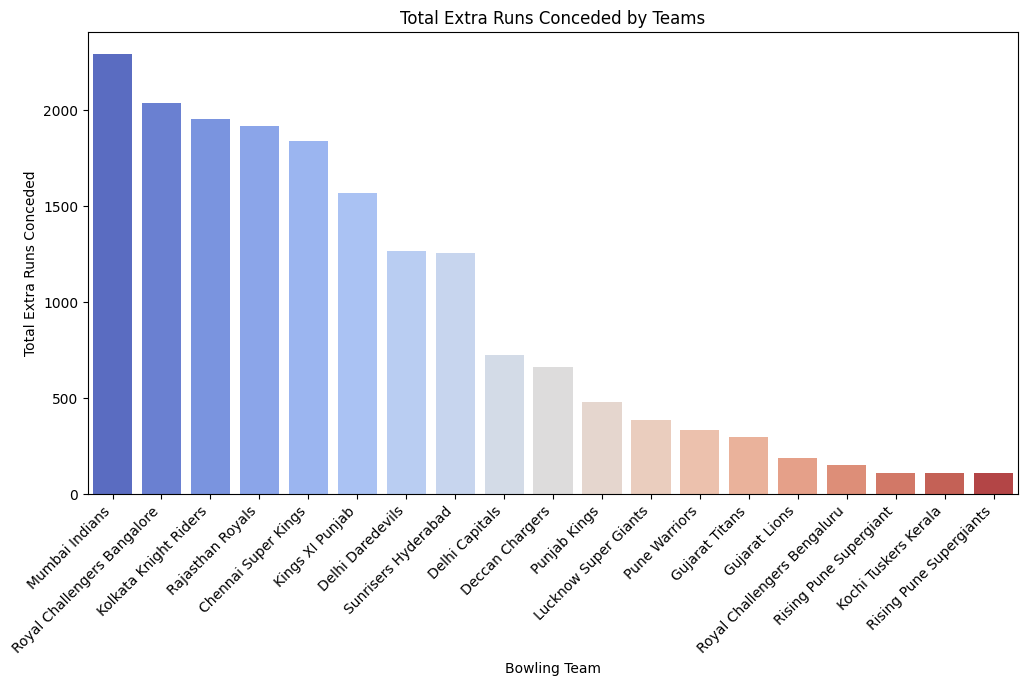

In [ ]:
# 1. Total extra runs conceded by teams
extra_runs_by_team = data.groupby("bowling_team")["extra_runs"].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x=extra_runs_by_team.index, y=extra_runs_by_team.values, palette="coolwarm")
plt.xticks(rotation=45, ha="right")
plt.xlabel("Bowling Team")
plt.ylabel("Total Extra Runs Conceded")
plt.title("Total Extra Runs Conceded by Teams")
plt.show()

<ipython-input-23-7f2a871707ed>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(runs_by_type.keys()), y=list(runs_by_type.values()), palette="coolwarm")


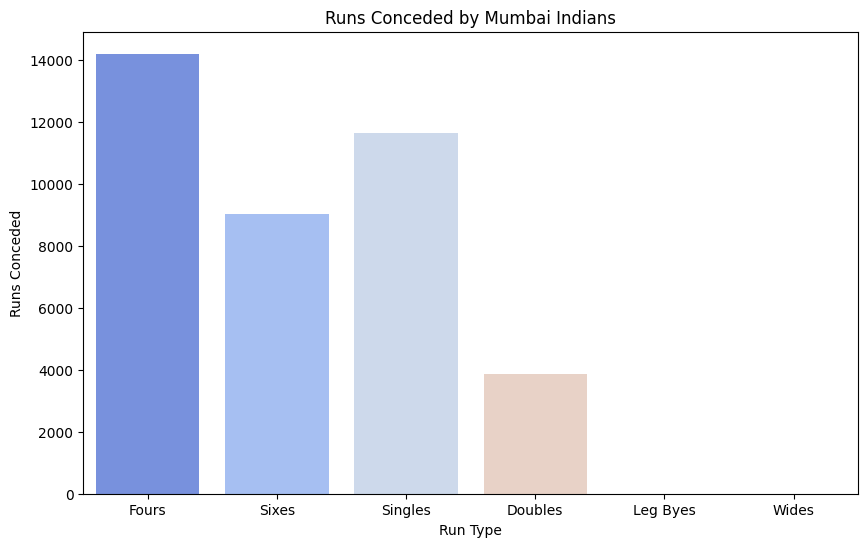

In [ ]:
# Runs conceded by Mumbai Indians
mi_bowling = data[data["bowling_team"] == "Mumbai Indians"]
runs_by_type = {
    "Fours": mi_bowling[mi_bowling["batsman_runs"] == 4]["batsman_runs"].sum(),
    "Sixes": mi_bowling[mi_bowling["batsman_runs"] == 6]["batsman_runs"].sum(),
    "Singles": mi_bowling[mi_bowling["batsman_runs"] == 1]["batsman_runs"].sum(),
    "Doubles": mi_bowling[mi_bowling["batsman_runs"] == 2]["batsman_runs"].sum(),
    "Leg Byes": mi_bowling.get("legbyes", pd.Series(0)).sum(),  # Handle missing column
    "Wides": mi_bowling.get("wides", pd.Series(0)).sum()  # Handle missing column
}
plt.figure(figsize=(10, 6))
sns.barplot(x=list(runs_by_type.keys()), y=list(runs_by_type.values()), palette="coolwarm")
plt.xlabel("Run Type")
plt.ylabel("Runs Conceded")
plt.title("Runs Conceded by Mumbai Indians")
plt.show()

<ipython-input-24-5f0a774d93f7>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mi_dismissal_counts.index, y=mi_dismissal_counts.values, palette="viridis")


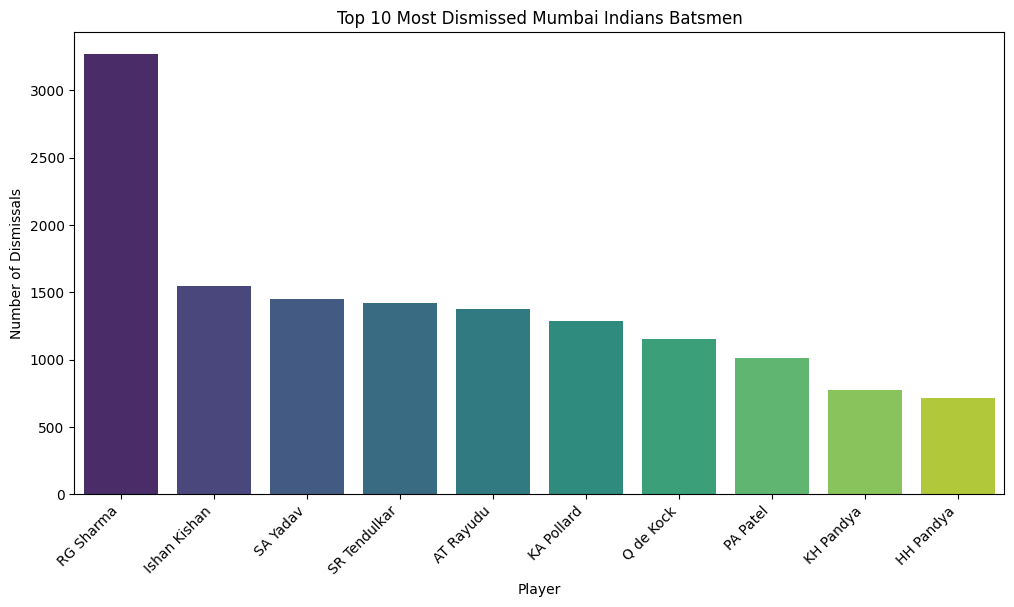

In [ ]:
# 2. Mumbai Indians dismissals
mi_dismissals = data[data["batting_team"] == "Mumbai Indians"]["player_dismissed"].dropna()
mi_dismissal_counts = mi_dismissals.value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=mi_dismissal_counts.index, y=mi_dismissal_counts.values, palette="viridis")
plt.xticks(rotation=45, ha="right")
plt.xlabel("Player")
plt.ylabel("Number of Dismissals")
plt.title("Top 10 Most Dismissed Mumbai Indians Batsmen")
plt.show()


<ipython-input-25-eb4d563a6fb4>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_batsmen.index, y=top_batsmen["strike_rate"], palette="magma")


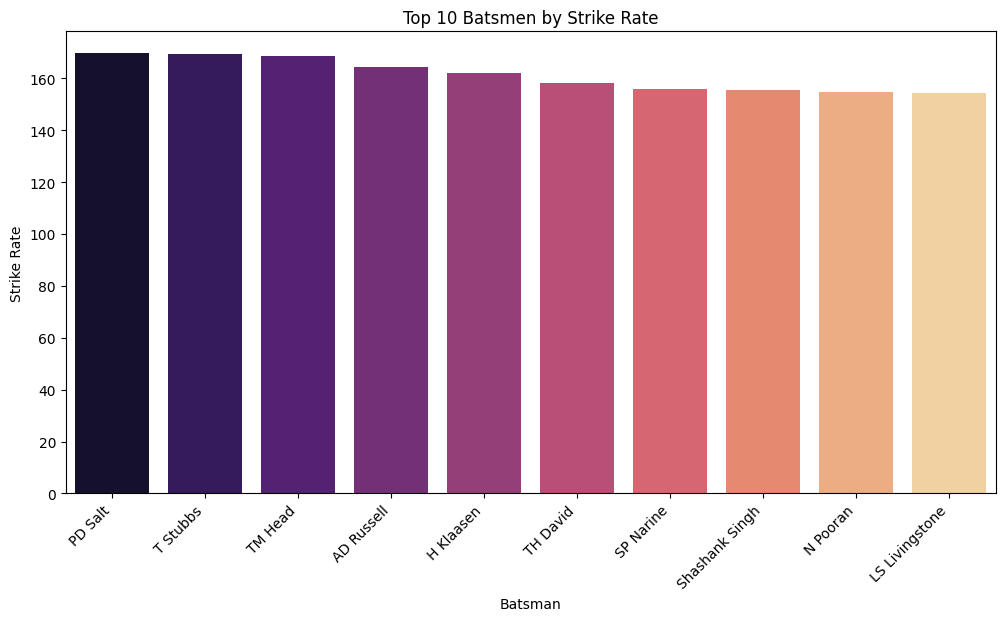

In [ ]:
# 3. Top 10 batsmen by strike rate
batsman_stats = data.groupby("batter").agg({"batsman_runs": "sum", "ball": "count"})
batsman_stats["strike_rate"] = (batsman_stats["batsman_runs"] / batsman_stats["ball"]) * 100
top_batsmen = batsman_stats[batsman_stats["ball"] >= 200].sort_values(by="strike_rate", ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_batsmen.index, y=top_batsmen["strike_rate"], palette="magma")
plt.xticks(rotation=45, ha="right")
plt.xlabel("Batsman")
plt.ylabel("Strike Rate")
plt.title("Top 10 Batsmen by Strike Rate")
plt.show()

<ipython-input-26-abce657229db>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fours_by_player.index, y=fours_by_player.values, palette="Blues_r")


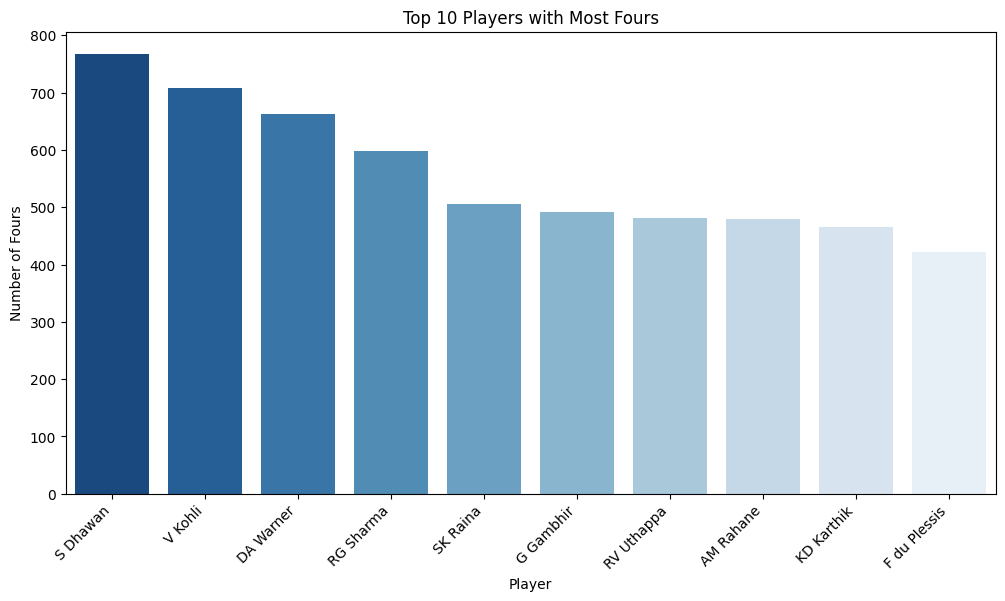

In [ ]:
# 4. Most fours hit by a player
fours_by_player = data[data["batsman_runs"] == 4].groupby("batter").size().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=fours_by_player.index, y=fours_by_player.values, palette="Blues_r")
plt.xticks(rotation=45, ha="right")
plt.xlabel("Player")
plt.ylabel("Number of Fours")
plt.title("Top 10 Players with Most Fours")
plt.show()


<ipython-input-27-2a7de750256e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_wicket_takers["bowler"], y=top_wicket_takers["wickets"], palette="Reds_r")


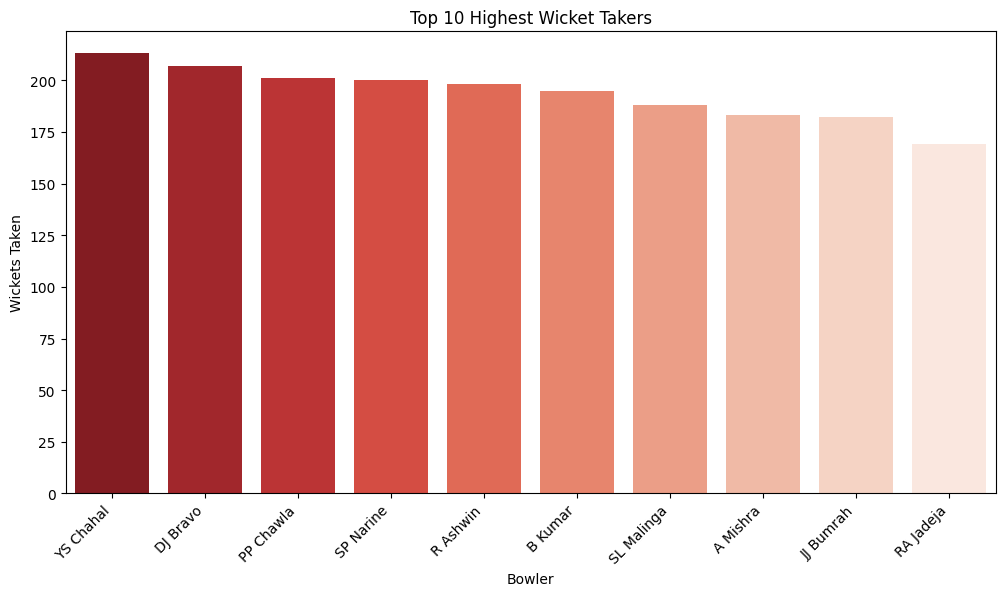

In [ ]:
# 5. Top 10 highest wicket-takers
top_wicket_takers = data[data["is_wicket"] == 1].groupby("bowler").size().reset_index(name="wickets").sort_values(by="wickets", ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_wicket_takers["bowler"], y=top_wicket_takers["wickets"], palette="Reds_r")
plt.xticks(rotation=45, ha="right")
plt.xlabel("Bowler")
plt.ylabel("Wickets Taken")
plt.title("Top 10 Highest Wicket Takers")
plt.show()

<ipython-input-29-abf347aa3698>:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  highest_toss_winners = toss_winners_yearly.groupby("year").apply(lambda x: x.nlargest(1, "toss_wins")).reset_index(drop=True)


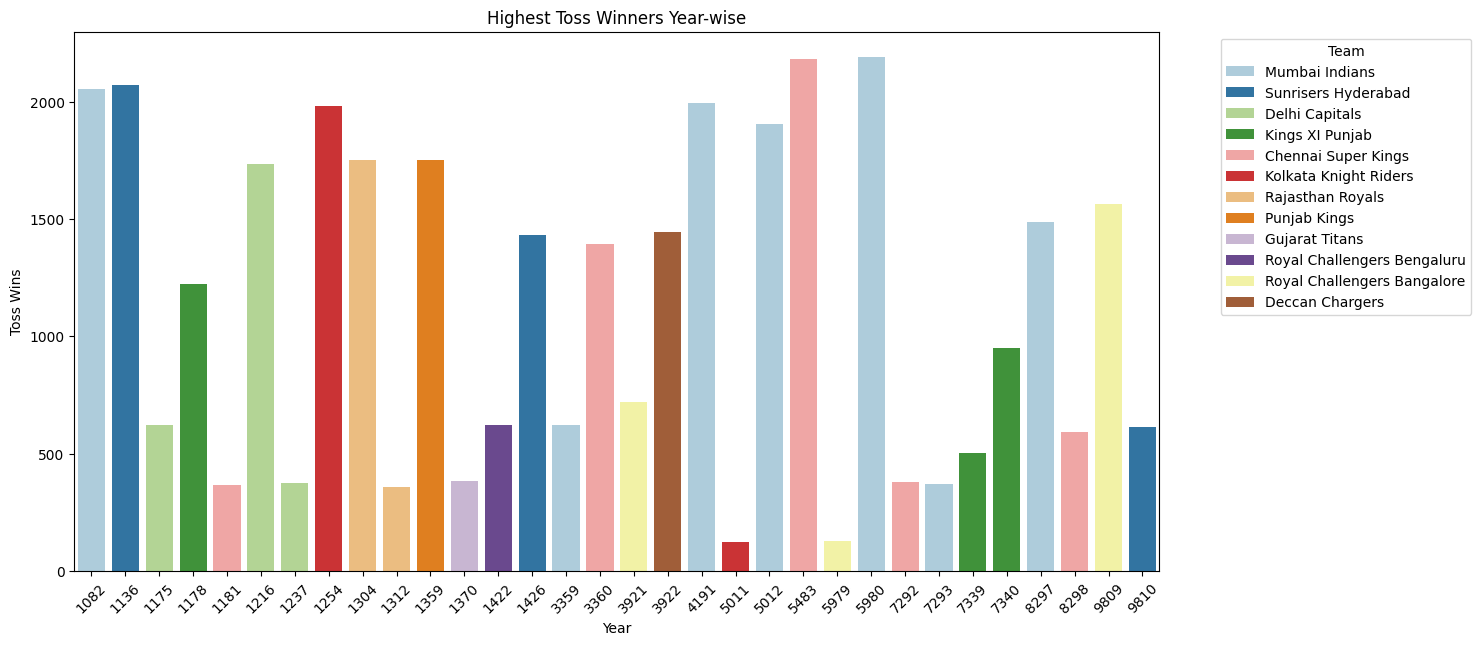

In [ ]:
# 6. Highest toss winners year-wise
data["year"] = data["match_id"].astype(str).str[:4]
toss_winners_yearly = data.groupby(["year", "batting_team"]).size().reset_index(name="toss_wins")
highest_toss_winners = toss_winners_yearly.groupby("year").apply(lambda x: x.nlargest(1, "toss_wins")).reset_index(drop=True)
plt.figure(figsize=(14, 7))
sns.barplot(data=highest_toss_winners, x="year", y="toss_wins", hue="batting_team", palette="Paired")
plt.xlabel("Year")
plt.ylabel("Toss Wins")
plt.title("Highest Toss Winners Year-wise")
plt.legend(title="Team", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.xticks(rotation=45)
plt.show()

<ipython-input-33-49263c01981f>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=kohli_catches_yearly["year"], y=kohli_catches_yearly["catches"], palette="Blues_r")


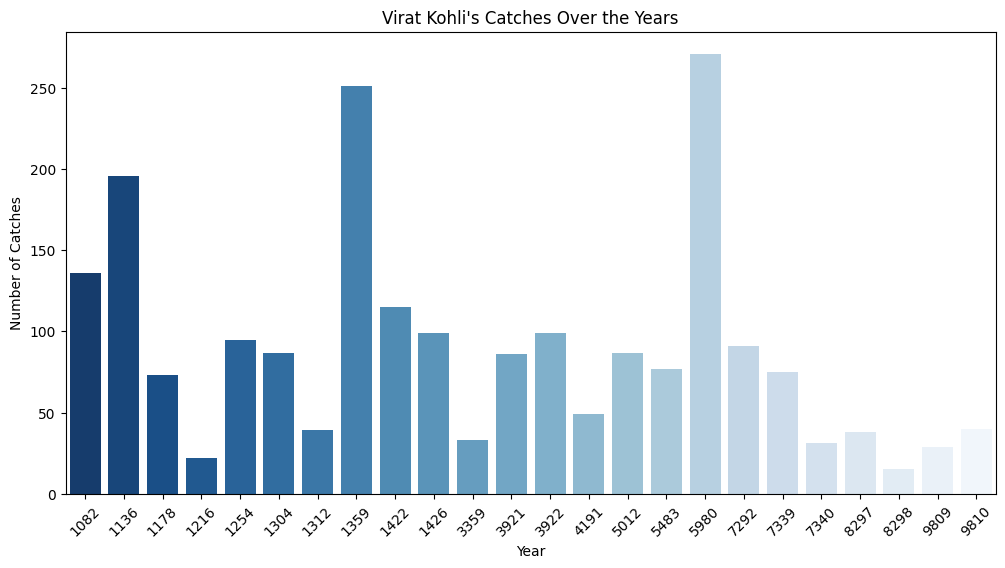

In [ ]:
# Ensure 'year' column exists by extracting from 'match_id'
data["year"] = data["match_id"].astype(str).str[:4]
kohli_catches = data[(data["dismissal_kind"] == "caught") & (data["fielder"] == "V Kohli")]
kohli_catches_yearly = kohli_catches.groupby("year").size().reset_index(name="catches")
plt.figure(figsize=(12, 6))
sns.barplot(x=kohli_catches_yearly["year"], y=kohli_catches_yearly["catches"], palette="Blues_r")
plt.xlabel("Year")
plt.ylabel("Number of Catches")
plt.title("Virat Kohli's Catches Over the Years")
plt.xticks(rotation=45)
plt.show()


<ipython-input-37-cd70f421e6a3>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=kohli_runs_yearly["year"], y=kohli_runs_yearly["batsman_runs"], palette="Oranges_r")


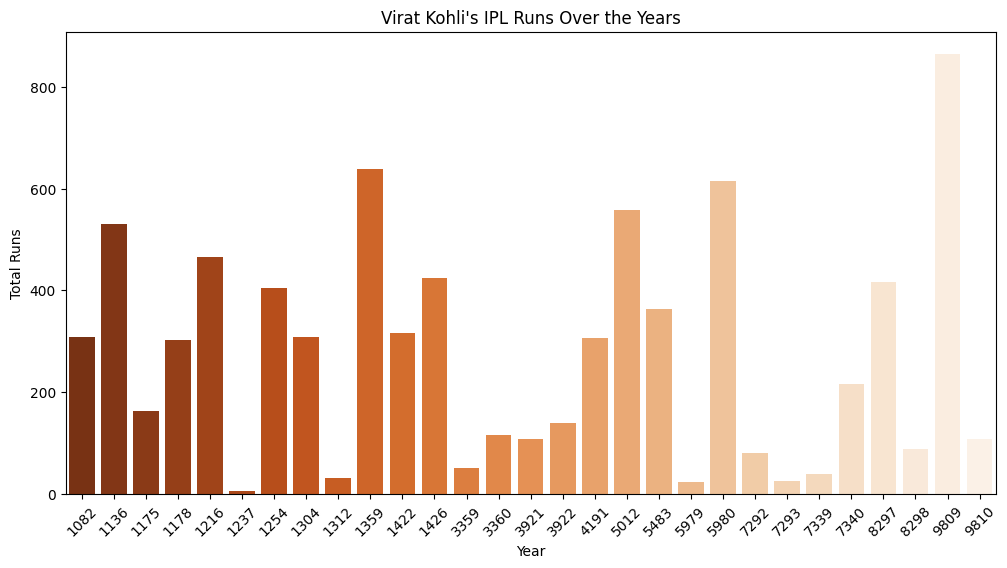

In [ ]:
# Ensure 'year' column exists by extracting from 'match_id'
data["year"] = data["match_id"].astype(str).str[:4]
kohli_runs = data[data["batter"] == "V Kohli"]
kohli_runs_yearly = kohli_runs.groupby("year")["batsman_runs"].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(x=kohli_runs_yearly["year"], y=kohli_runs_yearly["batsman_runs"], palette="Oranges_r")
plt.xlabel("Year")
plt.ylabel("Total Runs")
plt.title("Virat Kohli's IPL Runs Over the Years")
plt.xticks(rotation=45)
plt.show()


Virat Kohli's IPL Runs Over the Years:
     year  batsman_runs
0   1082           308
1   1136           530
2   1175           162
3   1178           302
4   1216           465
5   1237             6
6   1254           405
7   1304           309
8   1312            32
9   1359           639
10  1422           316
11  1426           425
12  3359            50
13  3360           115
14  3921           107
15  3922           139
16  4191           307
17  5012           557
18  5483           364
19  5979            24
20  5980           615
21  7292            80
22  7293            25
23  7339            39
24  7340           215
25  8297           417
26  8298            88
27  9809           865
28  9810           108


<ipython-input-34-0deb130cd387>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=kohli_runs_yearly["year"], y=kohli_runs_yearly["batsman_runs"], palette="Oranges_r")


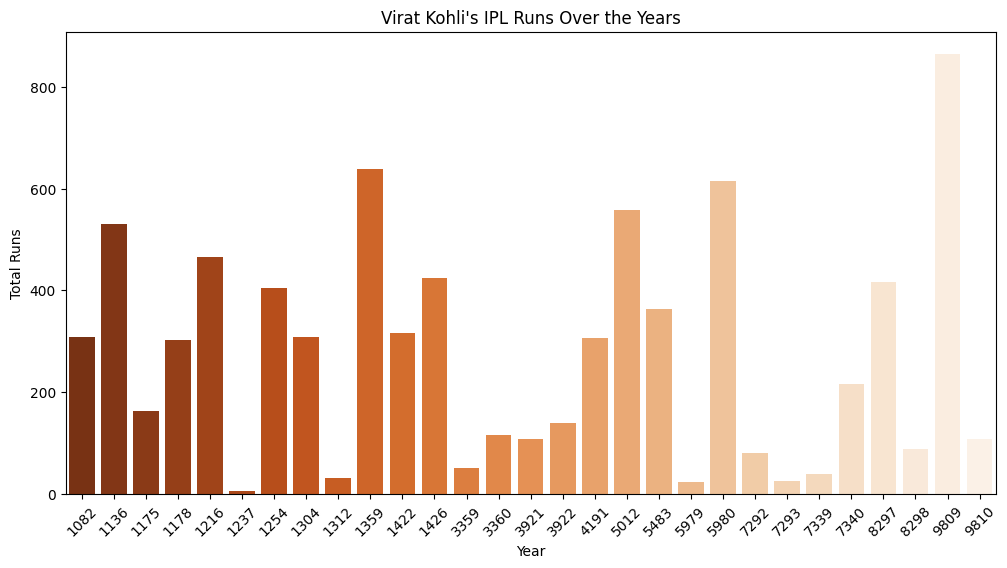

In [ ]:
# Ensure 'year' column exists by extracting from 'match_id'
data["year"] = data["match_id"].astype(str).str[:4]
kohli_runs = data[data["batter"] == "V Kohli"]
kohli_runs_yearly = kohli_runs.groupby("year")["batsman_runs"].sum().reset_index()
print("Virat Kohli's IPL Runs Over the Years:\n", kohli_runs_yearly)
plt.figure(figsize=(12, 6))
sns.barplot(x=kohli_runs_yearly["year"], y=kohli_runs_yearly["batsman_runs"], palette="Oranges_r")
plt.xlabel("Year")
plt.ylabel("Total Runs")
plt.title("Virat Kohli's IPL Runs Over the Years")
plt.xticks(rotation=45)
plt.show()


Virat Kohli's Fours Over the Years:
     year  fours
0   1082     23
1   1136     52
2   1175     18
3   1178     28
4   1216     24
5   1254     43
6   1304     30
7   1312      2
8   1359     65
9   1422     29
10  1426     33
11  3359      5
12  3360     13
13  3921      9
14  3922     13
15  4191     26
16  5012     55
17  5483     33
18  5979      4
19  5980     61
20  7292      6
21  7293      4
22  7339      3
23  7340     10
24  8297     29
25  8298      6
26  9809     73
27  9810     11


<ipython-input-35-f786ec28e26e>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=kohli_fours_yearly["year"], y=kohli_fours_yearly["fours"], palette="Blues_r")


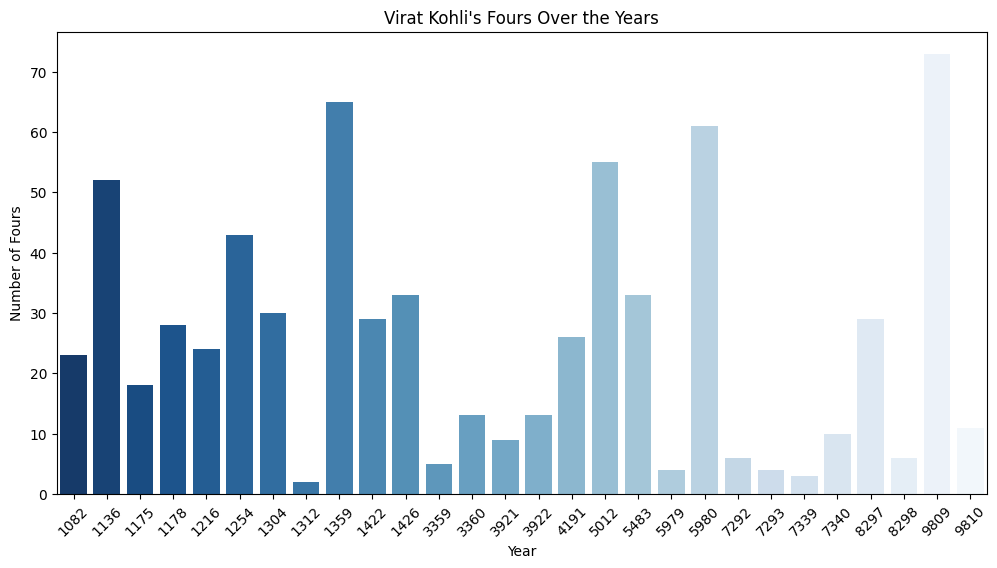

In [ ]:
# Ensure 'year' column exists by extracting from 'match_id'
data["year"] = data["match_id"].astype(str).str[:4]
kohli_fours = data[(data["batter"] == "V Kohli") & (data["batsman_runs"] == 4)]
kohli_fours_yearly = kohli_fours.groupby("year").size().reset_index(name="fours")
print("Virat Kohli's Fours Over the Years:\n", kohli_fours_yearly)
plt.figure(figsize=(12, 6))
sns.barplot(x=kohli_fours_yearly["year"], y=kohli_fours_yearly["fours"], palette="Blues_r")
plt.xlabel("Year")
plt.ylabel("Number of Fours")
plt.title("Virat Kohli's Fours Over the Years")
plt.xticks(rotation=45)
plt.show()


Virat Kohli's Sixes Over the Years:
     year  sixes
0   1082     11
1   1136     18
2   1175      2
3   1178     11
4   1216     11
5   1254      9
6   1304      7
7   1312      1
8   1359     16
9   1422     12
10  1426     26
11  3359      2
12  3360      2
13  3921      2
14  3922      6
15  4191     12
16  5012     16
17  5483     10
18  5979      1
19  5980     21
20  7292      3
21  7339      2
22  7340     11
23  8297     18
24  8298      5
25  9809     36
26  9810      2


<ipython-input-36-2c18a51d4eb7>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=kohli_sixes_yearly["year"], y=kohli_sixes_yearly["sixes"], palette="Reds_r")


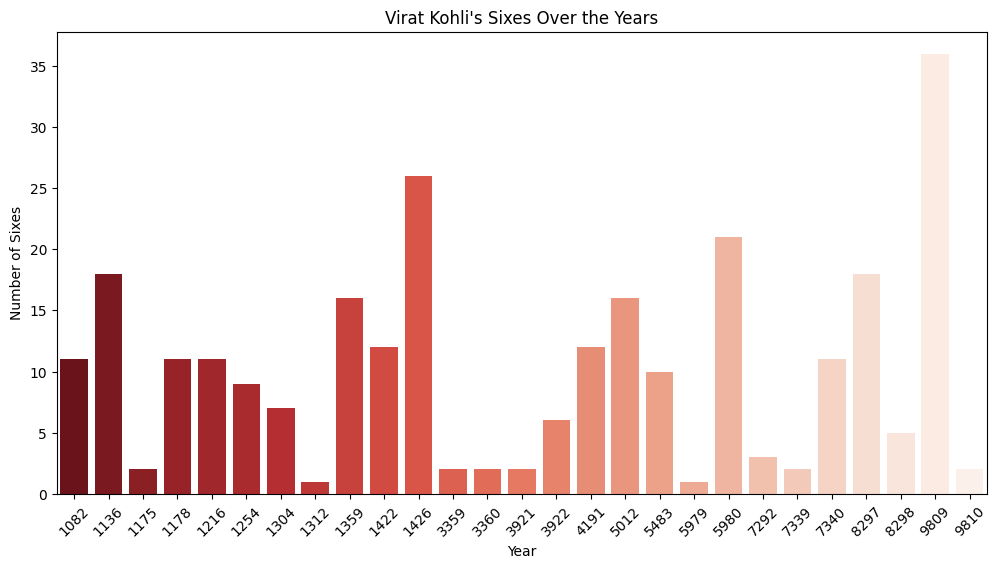

In [ ]:
# Ensure 'year' column exists by extracting from 'match_id'
data["year"] = data["match_id"].astype(str).str[:4]
kohli_sixes = data[(data["batter"] == "V Kohli") & (data["batsman_runs"] == 6)]
kohli_sixes_yearly = kohli_sixes.groupby("year").size().reset_index(name="sixes")
print("Virat Kohli's Sixes Over the Years:\n", kohli_sixes_yearly)
plt.figure(figsize=(12, 6))
sns.barplot(x=kohli_sixes_yearly["year"], y=kohli_sixes_yearly["sixes"], palette="Reds_r")
plt.xlabel("Year")
plt.ylabel("Number of Sixes")
plt.title("Virat Kohli's Sixes Over the Years")
plt.xticks(rotation=45)
plt.show()
